<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/280324normalfundus_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import os

In [132]:
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split')

['train', 'val', 'test']

In [133]:
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/train'),os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/val'),os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/test')

(['left eye fundus', 'right eye fundus'],
 ['right eye fundus', 'left eye fundus'],
 ['left eye fundus', 'right eye fundus'])

In [134]:
trainimages=os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/train/left eye fundus')
trainimages
print(len(trainimages))


421


In [135]:
trainimages=os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/train/right eye fundus')
trainimages
print(len(trainimages))

427


In [136]:
testimages=os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/test/left eye fundus')
trainimages
print(len(testimages))

42


In [137]:
testimages=os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/test/right eye fundus')
trainimages
print(len(testimages))

42


In [138]:
valimages=os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/val/left eye fundus')
trainimages
print(len(valimages))

51


In [139]:
valimages=os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/val/right eye fundus')
trainimages
print(len(valimages))

52


In [140]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train_data = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/train',
                                         target_size=(64,64),
                                         class_mode='binary')
val_data = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/val',
                                         target_size=(64,64),
                                         class_mode='binary')
test_data = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/test',
                                         target_size=(64,64),
                                         class_mode='binary')

Found 846 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [141]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [142]:
model.fit(train_data,batch_size=32,epochs=5,validation_data=val_data)
model.save('normal_fundus_model.keras')

Epoch 1/5
27/27 [==============================] - 13s 455ms/step - loss: 35.2610 - accuracy: 0.5910 - val_loss: 0.4352 - val_accuracy: 0.7476
Epoch 2/5
27/27 [==============================] - 13s 484ms/step - loss: 0.4357 - accuracy: 0.7825 - val_loss: 0.3896 - val_accuracy: 0.8350
Epoch 3/5
27/27 [==============================] - 13s 481ms/step - loss: 1.2116 - accuracy: 0.7187 - val_loss: 0.2496 - val_accuracy: 0.9126
Epoch 4/5
27/27 [==============================] - 14s 503ms/step - loss: 0.3521 - accuracy: 0.8806 - val_loss: 0.2962 - val_accuracy: 0.8738
Epoch 5/5
27/27 [==============================] - 12s 437ms/step - loss: 0.5982 - accuracy: 0.8322 - val_loss: 0.2424 - val_accuracy: 0.9126


In [143]:
predictions=model.predict(test_data)

3/3 [==============================] - 1s 210ms/step


In [144]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [145]:
y_true=test_data.classes

In [146]:
from sklearn import metrics
metrics.confusion_matrix(y_true,predictions)

array([[28, 14],
       [24, 18]])

In [152]:
print(metrics.classification_report(y_true,predictions,target_names=['left eye fundus','right eye fundus']))

                  precision    recall  f1-score   support

 left eye fundus       0.54      0.67      0.60        42
right eye fundus       0.56      0.43      0.49        42

        accuracy                           0.55        84
       macro avg       0.55      0.55      0.54        84
    weighted avg       0.55      0.55      0.54        84



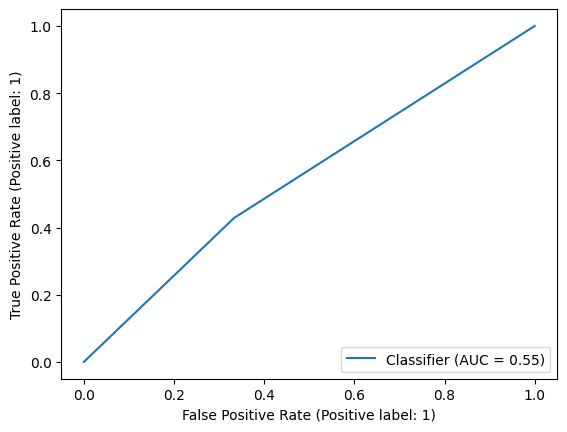

In [150]:
metrics.RocCurveDisplay.from_predictions(y_true,predictions)

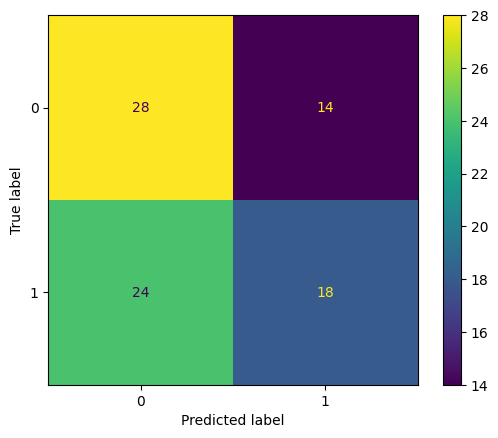

In [151]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,predictions)

1/1 [==============================] - 0s 134ms/step
Prediction: left eye fundus


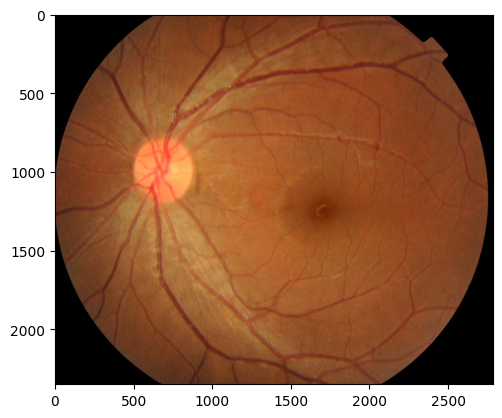

In [156]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/normal_fundus_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "right eye fundus"  # Example class names, modify as per your binary classes
    else:
        return "left eye fundus"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Normal Fundus Images/split/test/left eye fundus/1ffa9631-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage1=image.load_img('/content/drive/MyDrive/Normal Fundus Images/split/test/left eye fundus/1ffa9631-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage1)


1/1 [==============================] - 0s 88ms/step
Prediction: left eye fundus


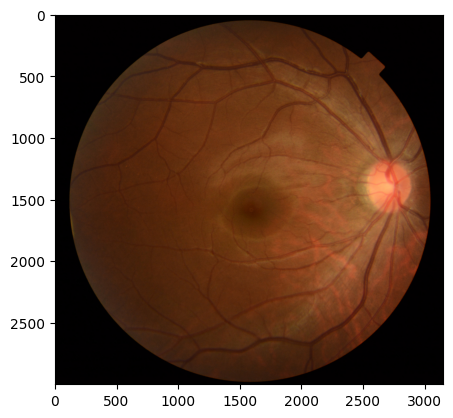

In [157]:
unknown_image_path = "/content/drive/MyDrive/Normal Fundus Images/split/test/right eye fundus/1ffa963f-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage1=image.load_img('/content/drive/MyDrive/Normal Fundus Images/split/test/right eye fundus/1ffa963f-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage1)